<a href="https://colab.research.google.com/github/AdityaMohanty374/ML_Algos/blob/main/LinearRegression_FineTuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

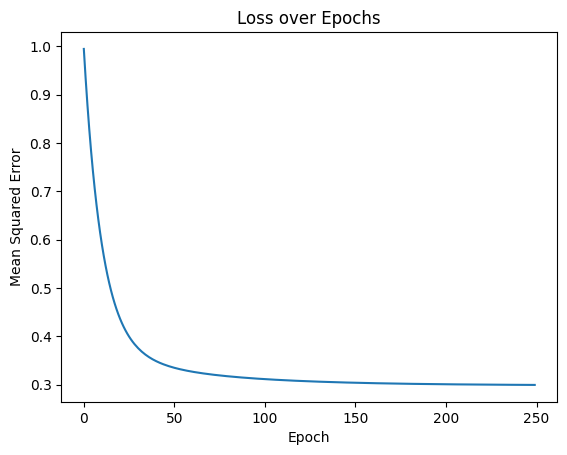

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
areas = []
ovQal = []
yearBuilt = []
yearRemo = []
garage = []
prices = []
x = [None for _ in range(6)]
w = [np.random.uniform(-0.01, 0.01) for _ in range(6)]
alpha=0.01
losses = []
def min_max_scale(lst):
    mean = np.mean(lst)
    std = np.std(lst)
    return [(x - mean) / (std + 1e-8) for x in lst]
df = pd.read_csv('train.csv')
selected_col = df[['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'GarageArea', 'SalePrice']]
for row in selected_col.itertuples(index=False):
  areas.append(row.LotArea)
  ovQal.append(row.OverallQual)
  yearBuilt.append(row.YearBuilt)
  yearRemo.append(row.YearRemodAdd)
  garage.append(row.GarageArea)
  prices.append(row.SalePrice)
mean_price = np.mean(prices)
std_price = np.std(prices)
areas = min_max_scale(areas)
ovQal = min_max_scale(ovQal)
yearBuilt = min_max_scale(yearBuilt)
yearRemo = min_max_scale(yearRemo)
garage = min_max_scale(garage)
prices = min_max_scale(prices)
n = len(areas)
for epoch in range(250):
  total_loss = 0
  for j in range(len(areas)):
    x[0] = 1
    x[1] = areas[j]
    x[2] = ovQal[j]
    x[3] = yearBuilt[j]
    x[4] = yearRemo[j]
    x[5] = garage[j]
    y = prices[j]
    h = sum(w[i]*x[i] for i in range(6))
    error = y - h
    total_loss += error**2
    for i in range(6):
      w[i] += alpha * 2/n * error * x[i]
  losses.append(total_loss / n)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss over Epochs')
plt.show()

In [21]:
w[0]

np.float64(-7.635730697359204e-05)

In [22]:
(w[0]*x[0]+w[1]*11622+w[2]*5+w[3]*1961+w[4]*1961+w[5]*730) * std_price + mean_price

np.float64(186826780.39105442)

In [23]:
std_price


np.float64(79415.29188606751)